[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//Madeira-International-Workshop-in-ML/2022_day_2/blob/main/CNN.ipynb)

# Convolutional Neural Networks

In [1]:
import numpy as np
from scipy import signal
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, MaxPooling1D, Activation, Flatten, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os
import pickle

import pydot 
import graphviz

from sklearn.metrics import confusion_matrix

# MNIST data loading 


In [2]:
# loading data
#https://en.wikipedia.org/wiki/MNIST_database
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

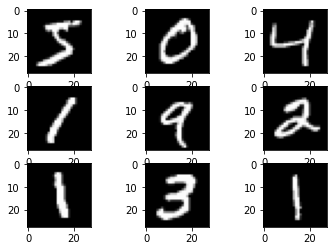

In [3]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

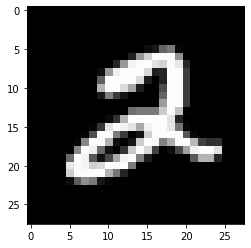

5


In [4]:
# data view
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(x_train[5],cmap=plt.cm.gray)
plt.show()
print(y_train[0])

In [5]:
# train data 
x_train.shape

(60000, 28, 28)

In [6]:
# test data 
x_test.shape

(10000, 28, 28)

# Convolutional Operation

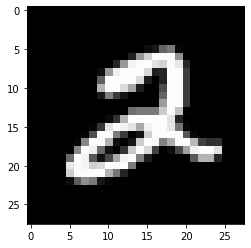

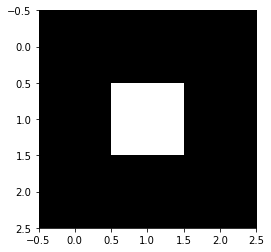

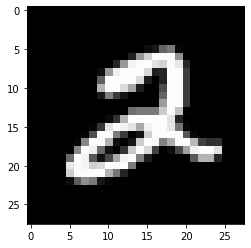

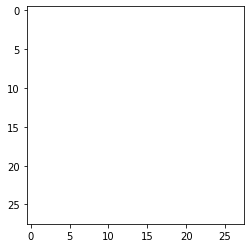

In [7]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 1, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
    filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

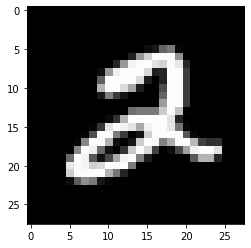

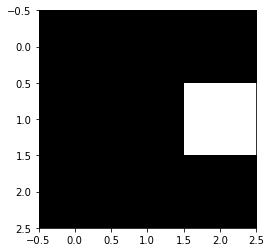

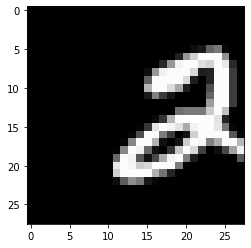

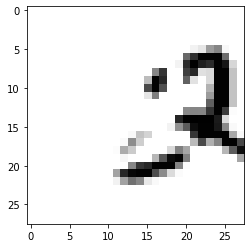

In [8]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 0, 1],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

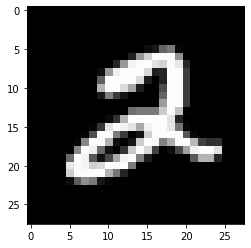

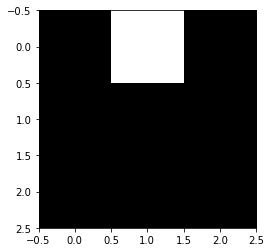

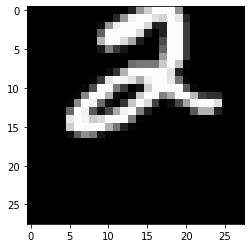

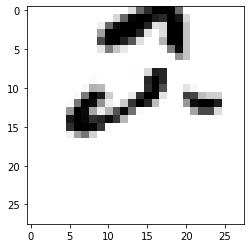

In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 1., 0.],[0, 0, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

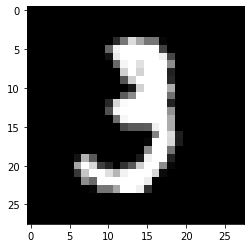

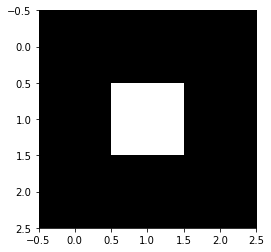

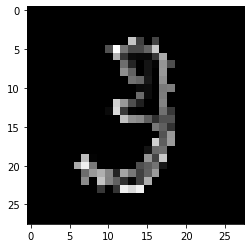

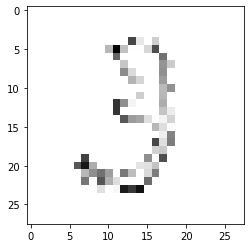

In [10]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[10]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[-1., -1., -1.],[-1., 8., -1.],[-1., -1., -1.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
# for i in range(0,2):
#     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

outputs is Shrinking 
Loosing information on corners of the image

Second method: (((W - K + 2P)/S) + 1)
        Here W = Input size
        K = Filter size
        S = Stride
        P = Padding 

        inpput_size - (filter_size - 1)

# Data pre-process

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#-1 means that the length in that dimension is inferred.

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [15]:
y_train_cat.shape

(60000, 10)

In [16]:
len(np.unique(y_train))

10

# Create a Sequential Model

In [113]:
model_sq = Sequential()

model_sq.add(Input(shape=(28, 28, 1)))
model_sq.add(Conv2D(32, (3, 3), activation='relu'))
#model_sq.add(Dropout(0.5))

#model_sq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Conv2D(64, (3, 3), activation='relu'))
model_sq.add(MaxPool2D(pool_size=(2, 2)))



In [114]:
model_sq.add(Flatten())
model_sq.add(Dense(128, activation='relu'))
model_sq.add(Dropout(0.5))
model_sq.add(Dense(10, activation='softmax'))



In [115]:
model_sq.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

What we ceated

In [116]:
model_sq.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [117]:
model_sq.layers[3]

In [118]:

tf.keras.utils.plot_model(model_sq, "my_first_model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [165]:
#Train the model.model

In [119]:
model_sq_history = model_sq.fit(x_train, y_train_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 28s 36ms/step - loss: 0.3141 - accuracy: 0.9038 - val_loss: 0.0763 - val_accuracy: 0.9765
Epoch 2/5
657/657 [==============================] - 22s 33ms/step - loss: 0.1035 - accuracy: 0.9696 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 3/5
657/657 [==============================] - 17s 26ms/step - loss: 0.0755 - accuracy: 0.9783 - val_loss: 0.0461 - val_accuracy: 0.9864
Epoch 4/5
657/657 [==============================] - 22s 33ms/step - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0532 - val_accuracy: 0.9847
Epoch 5/5
657/657 [==============================] - 24s 36ms/step - loss: 0.0526 - accuracy: 0.9845 - val_loss: 0.0401 - val_accuracy: 0.9881


313/313 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9894
0.9894000291824341


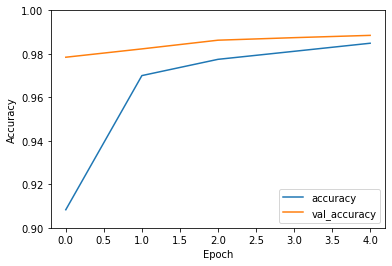

In [23]:
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [24]:
y_pred = model_sq.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [25]:
print(y_pred)

[[2.25194929e-09 6.19371150e-08 5.77153924e-06 ... 9.99993086e-01
  2.89105251e-09 1.79950234e-07]
 [1.13618817e-05 2.13438443e-06 9.99986410e-01 ... 3.16524099e-11
  3.24991376e-08 5.57090073e-13]
 [7.25655980e-10 9.99998331e-01 1.39556535e-08 ... 2.16803940e-07
  4.33135057e-08 6.16900198e-10]
 ...
 [5.14654042e-15 1.19521296e-10 1.39122939e-13 ... 2.25777827e-10
  1.01032960e-08 8.42327930e-10]
 [1.19259547e-10 1.20215426e-12 6.33855490e-14 ... 1.00106465e-10
  6.52557501e-05 1.53082436e-09]
 [3.14985127e-09 5.30397844e-11 3.30012817e-09 ... 6.05001202e-15
  7.47080531e-09 1.72629359e-11]]


In [26]:
y_pred_number=np.argmax(y_pred,axis=1)
print(y_pred_number)

[7 2 1 ... 4 5 6]


In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))

In [28]:
print(cf_matrix)

[[ 975    0    0    0    0    0    3    1    1    0]
 [   0 1130    2    1    0    1    1    0    0    0]
 [   3    0 1025    0    2    0    0    2    0    0]
 [   0    0    3 1003    0    1    0    2    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    1    5    0  880    2    1    1    0]
 [   2    2    0    0    2    2  950    0    0    0]
 [   0    3    6    3    0    0    0 1014    1    1]
 [   4    1    2    1    1    0    1    3  959    2]
 [   2    3    0    2    3    8    0    7    5  979]]


 CIFAR10 dataset


In [29]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


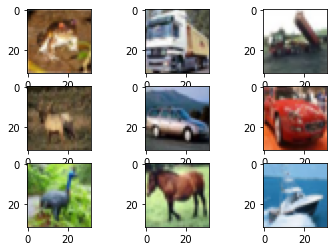

In [30]:


for i in range(9):
	# define subplot
    plt.subplot(330 + 1 + i)
	# plot raw pixel data
    plt.imshow(train_images[i])
# show the figure
plt.show()



In [32]:
y_train_labels_cat = to_categorical(train_labels, 10)
y_test_labels_cat = to_categorical(test_labels, 10)

In [33]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [34]:
train_images.shape

(50000, 32, 32, 3)

In [35]:
model_sq3 = Sequential()
model_sq3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_sq3.add(MaxPool2D ((2, 2)))
model_sq3.add(Conv2D(64, (3, 3), activation='relu'))
model_sq3.add(MaxPool2D ((2, 2)))
model_sq3.add(Conv2D(64, (3, 3), activation='relu'))


In [36]:
model_sq3.add(Flatten())
model_sq3.add(Dense(64, activation='relu'))
model_sq3.add(Dense(10, activation='softmax'))


Compile and train the model

In [37]:
model_sq3.compile(loss='categorical_crossentropy',#'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_sq3_history = model_sq3.fit(train_images,y_train_labels_cat , batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 26s 46ms/step - loss: 1.6362 - accuracy: 0.4024 - val_loss: 1.3993 - val_accuracy: 0.4927
Epoch 2/5
547/547 [==============================] - 19s 36ms/step - loss: 1.2603 - accuracy: 0.5495 - val_loss: 1.2008 - val_accuracy: 0.5753
Epoch 3/5
547/547 [==============================] - 18s 33ms/step - loss: 1.1107 - accuracy: 0.6082 - val_loss: 1.0945 - val_accuracy: 0.6177
Epoch 4/5
547/547 [==============================] - 19s 35ms/step - loss: 1.0056 - accuracy: 0.6477 - val_loss: 1.0213 - val_accuracy: 0.6487
Epoch 5/5
547/547 [==============================] - 26s 47ms/step - loss: 0.9231 - accuracy: 0.6765 - val_loss: 0.9839 - val_accuracy: 0.6624


313/313 [==============================] - 2s 7ms/step - loss: 0.9659 - accuracy: 0.6644
0.6643999814987183


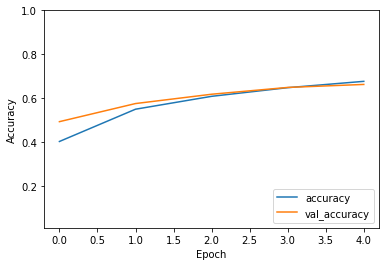

In [38]:
plt.plot(model_sq3_history.history['accuracy'], label='accuracy')
plt.plot(model_sq3_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.009, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq3.evaluate(test_images,  y_test_labels_cat)
print(test_acc)

Transfer learning

In [120]:
train_images.shape

(50000, 32, 32, 3)

In [121]:
train_images.shape

(50000, 32, 32, 3)

In [122]:
train_images_grayscaled = tf.image.rgb_to_grayscale(train_images)
test_images_grayscaled = tf.image.rgb_to_grayscale(test_images)
train_images_grayscaled.shape


TensorShape([50000, 32, 32, 1])

In [125]:
IMG_SIZE = 28

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers .Rescaling(1./255)
])
train_images_resized_grayscaled = resize_and_rescale(train_images_grayscaled)
test_images_resized_grayscaled = resize_and_rescale(test_images_grayscaled)

In [60]:
train_images_resized_grayscaled.shape

TensorShape([50000, 28, 28, 1])

In [1]:
for i in range(9):
	# define subplot
    plt.subplot(330 + 1 + i)
	# plot raw pixel data
    plt.imshow(train_images_resized_grayscaled[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

NameError: name 'plt' is not defined

In [127]:
model_sq.layers[0].trainable

True

In [128]:
model_sq.layers[0].trainable=False

In [76]:
model_sq.layers[0].trainable

False

In [107]:


for layer_number in range (0,len(model_sq.layers)-4):
    model_sq.layers[layer_number].trainable = False
    print('Layer ' +  model_sq.layers[layer_number].name + ' frozen.')



Layer conv2d_7 frozen.
Layer max_pooling2d_6 frozen.
Layer conv2d_8 frozen.
Layer max_pooling2d_7 frozen.


In [108]:
print(model_sq.layers[-5])

In [129]:

flat1 = Flatten()(model_sq.layers[-5].output)
class1 = Dense(124, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model_transfer = tf.keras.Model(inputs=model_sq.inputs, outputs=output)

In [130]:
model_transfer.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [131]:
model_transfer.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0   

In [132]:
model_transfer_history = model_transfer.fit(np.array(train_images_resized_grayscaled), y_train_labels_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 19s 26ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 2/5
547/547 [==============================] - 13s 23ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0984
Epoch 3/5
547/547 [==============================] - 13s 23ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.0979
Epoch 4/5
547/547 [==============================] - 13s 24ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0979
Epoch 5/5
547/547 [==============================] - 12s 22ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0984
